<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/RidgeAndLassoRegression/FeatureSelection%26ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded  = files.upload()

Saving Algerian_forest_fires_dataset_cleaned.csv to Algerian_forest_fires_dataset_cleaned.csv


In [5]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_cleaned.csv')

In [6]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
# drop month, day and year
new_df = df.drop(['day', 'month', 'year'], axis=1)

In [9]:
new_df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
new_df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [11]:
# Encoding
new_df['Classes']=np.where(new_df['Classes'].str.contains('not fire'), 0, 1)

In [12]:
new_df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [13]:
new_df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [14]:
# now we will classify dependent and independent features
x = new_df.drop('FWI', axis=1)
y = new_df['FWI']

In [15]:
x.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [16]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((194, 12), (49, 12), (194,), (49,))

In [19]:
# feature selection based on correlation
x_train.corr()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Unnamed: 0,1.000000,0.224207,-0.377365,-0.196719,-0.057883,0.250572,0.258692,0.056745,0.310548,0.185838,0.203362,0.867546
Temperature,0.224207,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.377365,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.196719,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.057883,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.250572,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.258692,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.056745,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.310548,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.185838,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326


<Axes: >

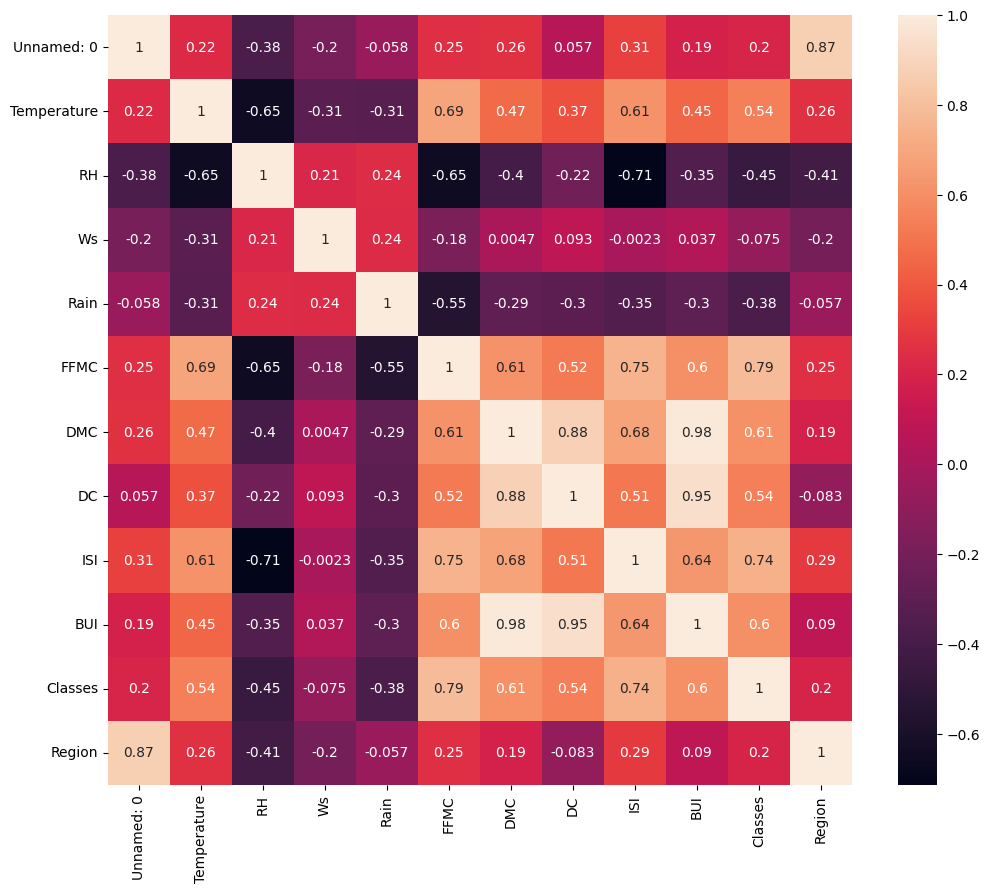

In [20]:
# now the time to check for multicollinearity
plt.figure(figsize=(12, 10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)

In [21]:
def correlation(dataset, threshold):
  col_corr = set()
  correlation_matrix = dataset.corr()
  for i in range(len(correlation_matrix.columns)):
    # we are iterating over length of the correlation matrix
    # trying to cover each column
    for j in range(i):
      # same goes her so from the initialization value to the value of i
      # just like iterating over a matrix
      if abs(correlation_matrix.iloc[i, j]) > threshold:
        # checking if the current correlation coefficient
        # is greater than the threshold value
        # if so means the two features are associated to each other
        # strong enough
        column_name = correlation_matrix.columns[i]
        # here after finding out the current column, fetching it from the
        # correlation matrix and then adding it to the set
        col_corr.add(column_name)
  return col_corr

In [22]:
# threshold ----> Domain Expertise
corr_features=correlation(x_train, 0.9)

In [23]:
x_train.columns

Index(['Unnamed: 0', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'Classes', 'Region'],
      dtype='object')

In [24]:
# drop features where correlation is more than 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)

In [25]:
x_train.shape, x_test.shape

((194, 11), (49, 11))

In [26]:
# Feature Scaling and Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled

array([[-0.10943115, -0.87563202,  0.21321832, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 1.228209  ,  0.22209084, -1.65484925, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 0.52343086,  1.5942444 , -1.25454906, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-0.44024539, -1.97335488,  0.947102  , ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.82547863,  0.49652155, -0.18708188, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.29641311, -0.60120131,  1.0138187 , ..., -0.88904223,
        -1.14434427, -1.01036297]])

Text(0.5, 1.0, 'x_train after scaling')

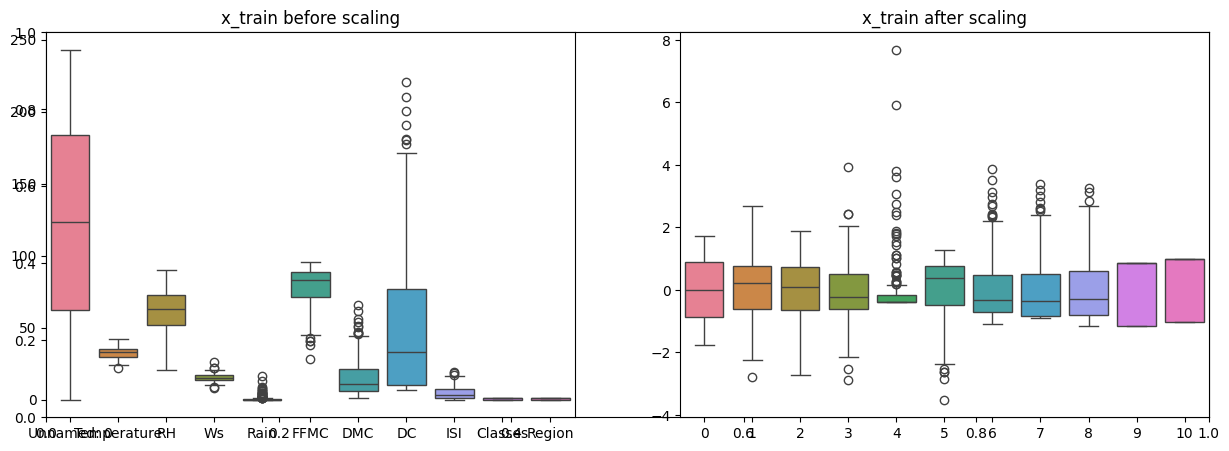

In [29]:
# box plots to understand the StandardScaler
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

In [30]:
# Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [31]:
# creating the object of LinearRegression
linear_regression = LinearRegression()

Mean Absolute Error :  0.4973995415860585
R2 Score :  0.9764962004187796


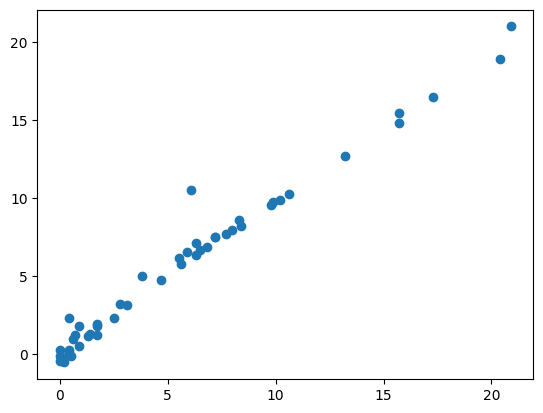

In [32]:
linear_regression.fit(x_train_scaled, y_train)
y_pred = linear_regression.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)
r2Score = r2_score(y_test, y_pred)
print("R2 Score : ", r2Score)
plt.scatter(y_test, y_pred)

In [33]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

Mean Absolute Error :  1.0025429942057416
R2 Score :  0.9440044118503477


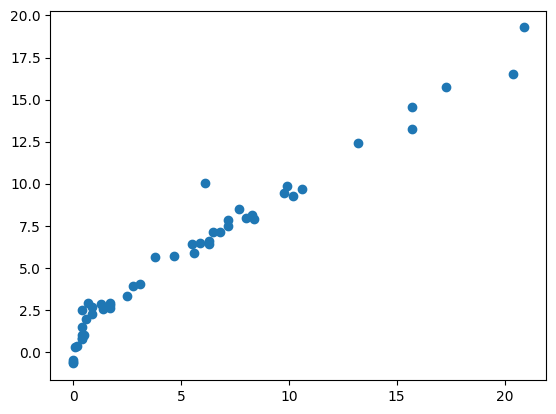

In [34]:
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)
score = r2_score(y_test, y_pred)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

Mean Absolute Error :  0.5067779490696468
R2 Score :  0.9756385656261997


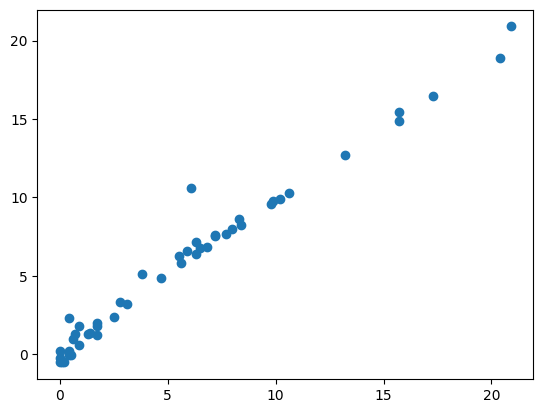

In [35]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)
score = r2_score(y_test, y_pred)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

In [36]:
# Elastic Net Regression

In [37]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()

Mean Absolute Error :  1.6097297006611804
R2 Score :  0.8724249728840382


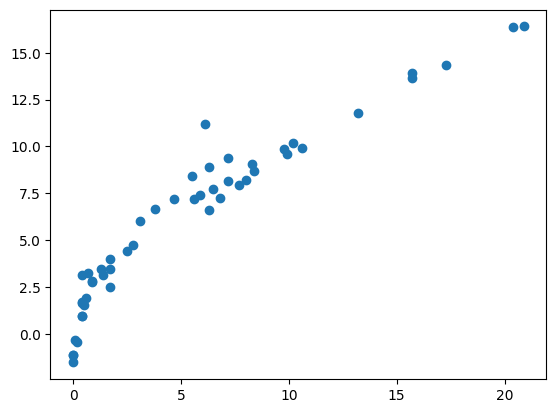

In [38]:
elasticNet.fit(x_train_scaled, y_train)
y_pred = elasticNet.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)
score = r2_score(y_test, y_pred)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

In [39]:
# cross validation lasso

Mean Absolute Error :  0.46855407599306526
R2 Score :  0.9770044489197495


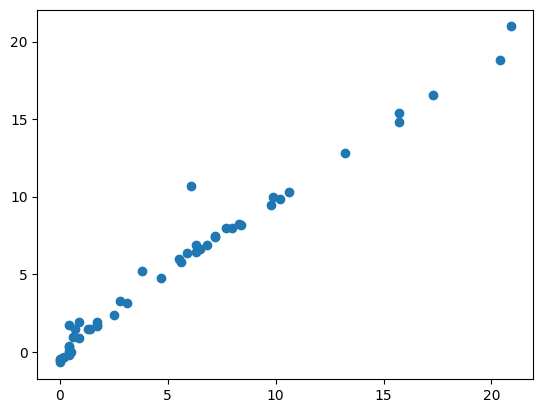

In [42]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5)
lassoCV.fit(x_train_scaled, y_train)
y_pred = lassoCV.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)

score = r2_score(y_test, y_pred)
print("R2 Score : ", score)

plt.scatter(y_test, y_pred)

In [43]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)

Mean Absolute Error :  0.5067779490696468
R2 Score :  0.9756385656261997


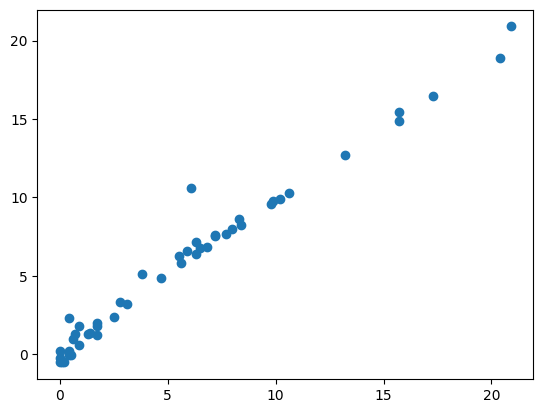

In [44]:
ridgeCV.fit(x_train_scaled, y_train)
y_pred = ridgeCV.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)

score = r2_score(y_test, y_pred)
print("R2 Score : ", score)


plt.scatter(y_test, y_pred)

Mean Absolute Error :  0.5241410819884208
R2 Score :  0.9742896478117218


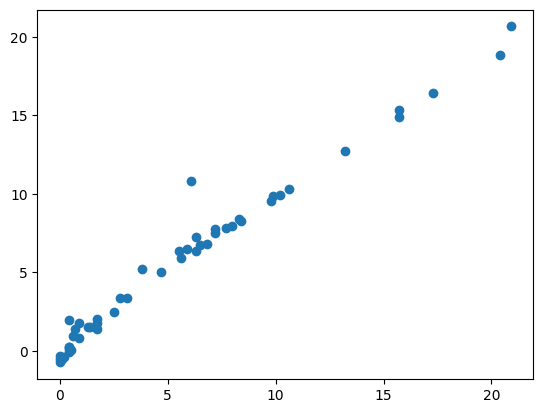

In [46]:
from sklearn.linear_model import ElasticNetCV
elasticNetCV = ElasticNetCV(cv=5)

elasticNetCV.fit(x_train_scaled, y_train)

y_pred = elasticNetCV.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)

score = r2_score(y_test, y_pred)
print("R2 Score : ", score)

plt.scatter(y_test, y_pred)